<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/DL/2348513_Lab3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.

In [59]:
import numpy as np

def eqxn(x):
    return (0.5*(x**2))-(30*x)+(100)

# derivative
def eqxn_derivative(x):
    return x - 30

#starting value, momentum term
x = 20
A = 0.1
m = 0.9

#momentum initializing it to 0
iv=0
#for 3 iterations
i=3
for iter in range(i):

    a1 = eqxn_derivative(x)
    #updating momentum
    iv = m * iv + (1-m) * a1

    x = x - A * iv
    cost = eqxn(x)
    #to print 3 iterations.
    print("For iteration ",iter+1," Price: ",x, " Revenue cost: ",cost)


For iteration  1  Price:  20.1  Revenue cost:  -300.995
For iteration  2  Price:  20.289  Revenue cost:  -302.84823950000003
For iteration  3  Price:  20.55621  Revenue cost:  -305.40741521794996


In [60]:
#to find the optimal price
i=500
for iter in range(i):

    a1 = eqxn_derivative(x)
    #updating momentum
    iv = m * iv + (1-m) * a1

    x = x - A * iv
    cost = eqxn(x)

print("Optimal Price:", x)

Optimal Price: 29.999999999965066


Q2.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [62]:
df=pd.read_csv('/content/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [63]:
df.shape

(569, 32)

In [64]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [65]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values

Target Columns:

diagnosis

whether tumor is malignant or benign
Malignant is cancerous while benign is not.

Checking for unbalanced Data

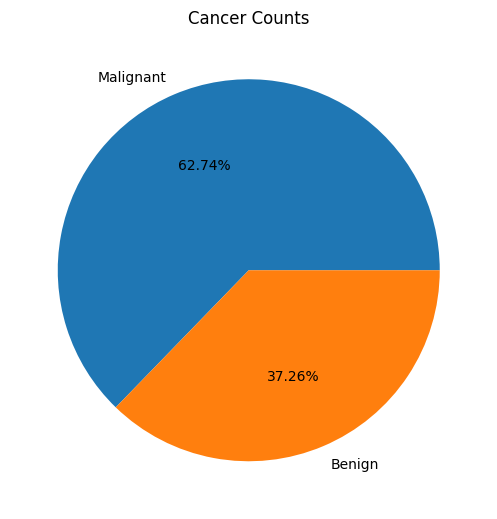

In [66]:
diag = df["diagnosis"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(diag, labels=["Malignant", "Benign"], autopct="%.2f%%")
plt.title("Cancer Counts")
plt.tight_layout()
plt.show()

not much imbalance is there so not needed.

In [67]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [68]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Training and Testing

ID will be uniue so not that much used so dropping it.

In [69]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

# training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model building

In [71]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1, activation='sigmoid'))

In [73]:
model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(1, activation='sigmoid'))

In [74]:
#Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
#model training
mt = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 4.9188 - accuracy: 0.7885 - val_loss: 4.4846 - val_accuracy: 0.9451
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 4.2557 - accuracy: 0.9670 - val_loss: 3.9862 - val_accuracy: 0.9560
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 3.7773 - accuracy: 0.9698 - val_loss: 3.5400 - val_accuracy: 0.9560
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 3.3397 - accuracy: 0.9753 - val_loss: 3.1255 - val_accuracy: 0.9451
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 2.9351 - accuracy: 0.9780 - val_loss: 2.7429 - val_accuracy: 0.9451
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 2.5611 - accuracy: 0.9753 - val_loss: 2.3888 - val_accuracy: 0.9560
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 2.2186 - accuracy: 0.9808 - val_loss: 2.0657 - val_accuracy: 0.9451
Epoch 8/100


In [76]:
mt2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 1.7889 - accuracy: 0.8242 - val_loss: 1.5378 - val_accuracy: 0.9451
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.4258 - accuracy: 0.9505 - val_loss: 1.3211 - val_accuracy: 0.9451
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.2399 - accuracy: 0.9533 - val_loss: 1.1685 - val_accuracy: 0.9560
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0904 - accuracy: 0.9615 - val_loss: 1.0408 - val_accuracy: 0.9560
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9617 - accuracy: 0.9725 - val_loss: 0.9284 - val_accuracy: 0.9670
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8498 - accuracy: 0.9890 - val_loss: 0.8273 - val_accuracy: 0.9670
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7521 - accuracy: 0.9863 - val_loss: 0.7402 - val_accuracy: 0.9670
Epoch 8/100


In [77]:
mt3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 12.2318 - accuracy: 0.8819 - val_loss: 11.3510 - val_accuracy: 0.9341
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 10.7026 - accuracy: 0.9615 - val_loss: 9.9123 - val_accuracy: 0.9451
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 9.3161 - accuracy: 0.9698 - val_loss: 8.5881 - val_accuracy: 0.9451
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 8.0373 - accuracy: 0.9670 - val_loss: 7.3681 - val_accuracy: 0.9451
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 6.8633 - accuracy: 0.9670 - val_loss: 6.2586 - val_accuracy: 0.9560
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 5.8017 - accuracy: 0.9753 - val_loss: 5.2596 - val_accuracy: 0.9560
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 4.8459 - accuracy: 0.9725 - val_loss: 4.3613 - val_accuracy: 0.9560
Epoch 8/1

Model metrics

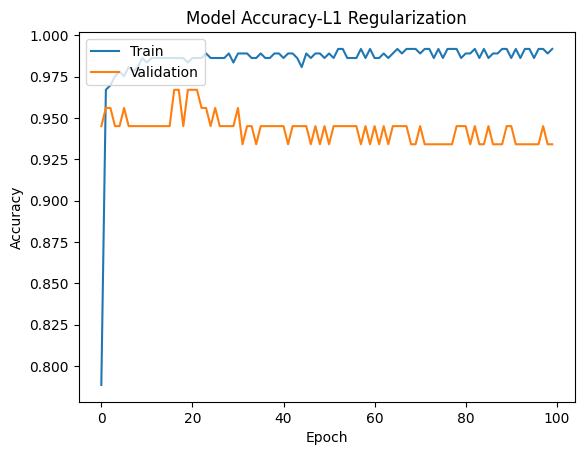

In [78]:
plt.plot(mt.history['accuracy'])
plt.plot(mt.history['val_accuracy'])
plt.title('Model Accuracy-L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

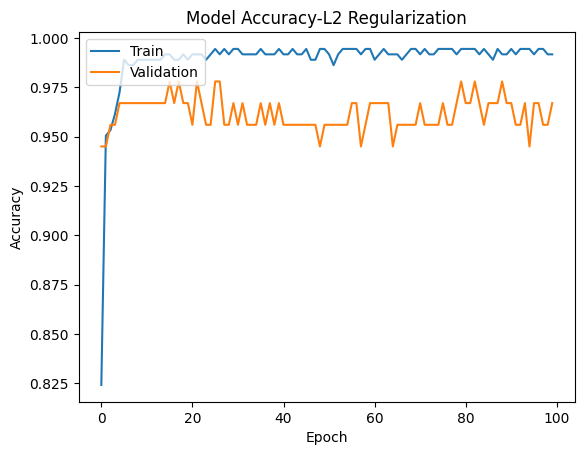

In [79]:
plt.plot(mt2.history['accuracy'])
plt.plot(mt2.history['val_accuracy'])
plt.title('Model Accuracy-L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

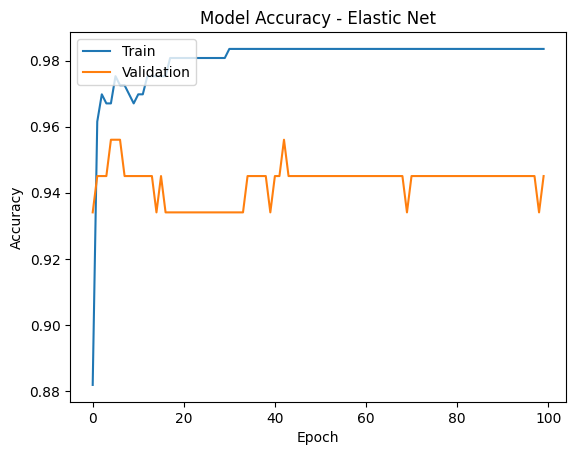

In [80]:
plt.plot(mt3.history['accuracy'])
plt.plot(mt3.history['val_accuracy'])
plt.title('Model Accuracy - Elastic Net')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [81]:
#model 1
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

4/4 [==============================] - 0s 3ms/step


In [82]:
#model 2
y_probs2 = model2.predict(X_test)
y_pred2 = (y_probs2 > 0.5).astype(int)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
cf2 = confusion_matrix(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

4/4 [==============================] - 0s 3ms/step


In [83]:
#model 3
y_probs3 = model3.predict(X_test)
y_pred3 = (y_probs3 > 0.5).astype(int)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f13 = f1_score(y_test, y_pred)
cf3 = confusion_matrix(y_test, y_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict(X_test))
roc_auc3 = auc(fpr3, tpr3)

4/4 [==============================] - 0s 3ms/step


In [84]:
print("L1 Regularization")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

print("\nL2 Regularization")
print("Accuracy: ",accuracy2)
print("Precision: ",precision2)
print("Recall: ",recall2)
print("F1 Score: ",f12)

print("\nElastic Net")
print("Accuracy: ",accuracy3)
print("Precision: ",precision3)
print("Recall: ",recall3)
print("F1 Score: ",f13)

L1 Regularization
Accuracy:  0.9736842105263158
Precision:  0.9761904761904762
Recall:  0.9534883720930233
F1 Score:  0.9647058823529412

L2 Regularization
Accuracy:  0.9736842105263158
Precision:  0.9761904761904762
Recall:  0.9534883720930233
F1 Score:  0.9647058823529412

Elastic Net
Accuracy:  0.9736842105263158
Precision:  0.9761904761904762
Recall:  0.9534883720930233
F1 Score:  0.9647058823529412


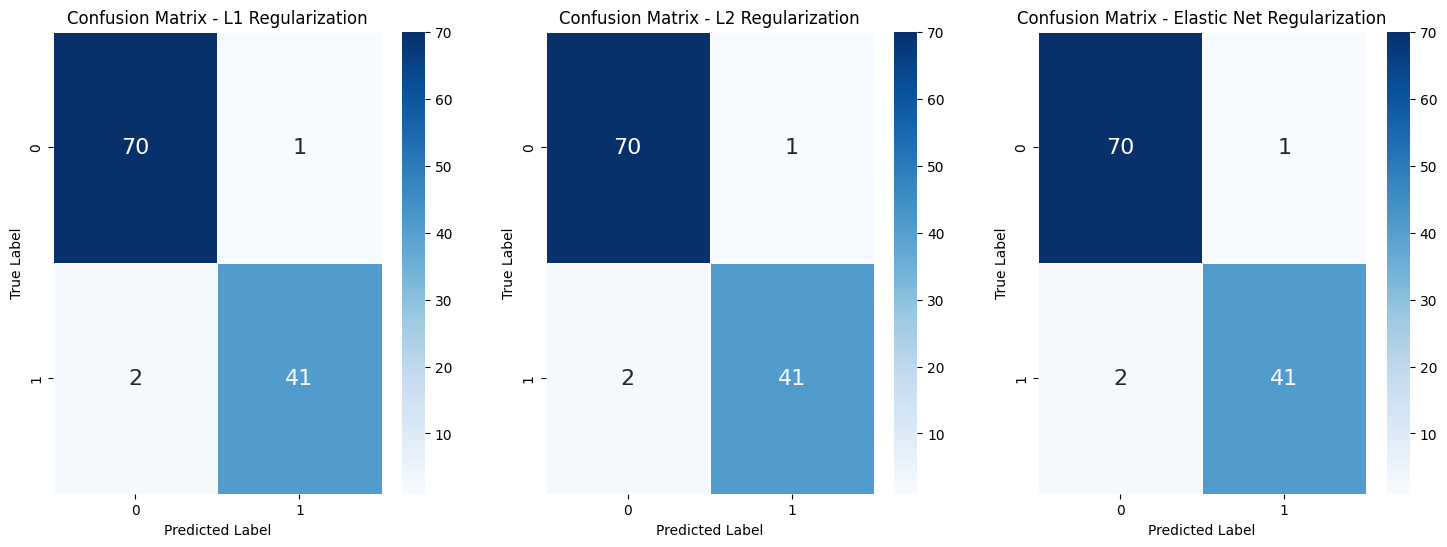

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# L1 Regularization
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=axes[0])
axes[0].set_title('Confusion Matrix - L1 Regularization')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# L2 Regularization
sns.heatmap(cf2, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=axes[1])
axes[1].set_title('Confusion Matrix - L2 Regularization')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Elastic Net
sns.heatmap(cf3, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=axes[2])
axes[2].set_title('Confusion Matrix - Elastic Net Regularization')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.show()

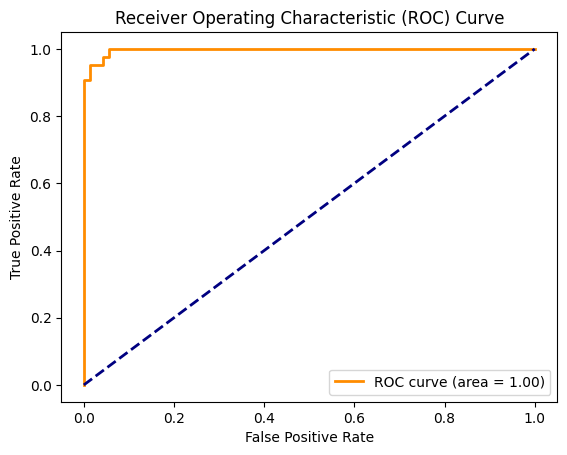

In [57]:
# ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

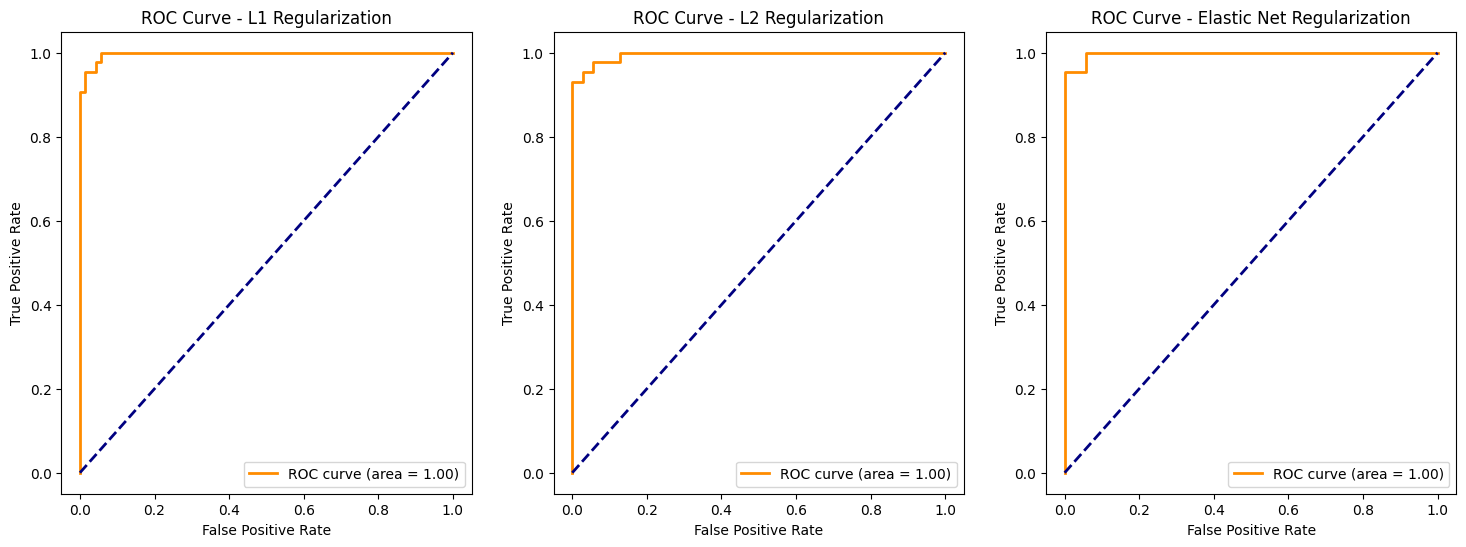

In [58]:
plt.figure(figsize=(18, 6))

# L1 Regularization
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L1 Regularization')
plt.legend(loc='lower right')

# L2 Regularization
plt.subplot(1, 3, 2)
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L2 Regularization')
plt.legend(loc='lower right')

# Elastic Net
plt.subplot(1, 3, 3)
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Elastic Net Regularization')
plt.legend(loc='lower right')

plt.show()

Due to high Epochs(100) our all 3 models have arounf the same accuracy.
There confusion matrix value is also same.
From observation we can say that the models have the same accuracy. The difference is iterations in which they are achieving this.